## 深層学習読書会#1 ##

* 東北大の岡谷貴之教授の書かれた「深層学習」の読書会
* ビッグウェーブに乗るしかない

## 方針 ##

* 基本的に読書会
    * 本を順に読み進めながら疑問点はホワイトボードなどで話し合う
    * スライドは最低限作成
        * 一応担当は決める
* できれば実装もする

## 予定 ##

* 予定
    * 初回: 第1章〜第3章(〜P.33)
    * 第2回: 第3章〜第5章(P.55〜P.77)
        * 3,4章は大橋
        * 5章は斉藤たくまさん
        * (石井さん)
        * 6/21
    * 第3回: 第6章〜第8章(P.78〜P.156)
    * 第4回: 予備回
    * 第5回: 実装回、ライブラリの使用報告など
    * 第6回: セミナー形式の勉強会
        * 是非みなさん発表を
* 2〜4週間に1回のペース
    * 午前午後で通しでやる可能性も有

## 自己紹介 ##

* 大橋宏正
    * 一応主催者
* 某メーカー勤務の音響信号処理エンジニア
* そろそろc++とpython以外も書きたい

## 構成 ##

* 1章: 導入
* 2章: 順伝搬ネットワーク
    * NNを使った計算方法
    * 目的(回帰・分類)に応じた最終出力の設定
* 3章, 4章: NNの学習方法の紹介
    * 3章: 勾配降下法
    * 4章: 誤差逆伝播法

* 5章: AutoEncoderの話
    * NNの事前学習
    * 前処理
* 6章: 畳み込みNN
    * 画像認識などで用いられる畳み込みNN
* 7章: Recurrent NN
    * 時系列処理に適するNN
* 8章: ボルツマンマシン(RBM, DBN, DBMなど)
    * NNの事前学習

### 2.1 順伝搬の計算 ###

* xは入力(第一層の出力と解釈)、wはネットワークの重み係数
    * ドットは内積を表す

$$ u_1 = \begin{bmatrix} w_{11} \\ w_{12} \\ w_{13} \\ w_{14} \end{bmatrix} \cdot \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix} + b_1$$

* 従ってwは$w_{To From}$と解釈

* バイアス項を係数ベクトルに入れる記法(後の章で出て来る)
$$ u_1 = \begin{bmatrix} b_1 \\ w_{11} \\ w_{12} \\ w_{13} \\ w_{14} \end{bmatrix} \cdot \begin{bmatrix} 1 \\ x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix}$$

* 活性化関数(後述)をfとすると出力$z_1$は以下のとおり
$$ z_1 = f(u_1) = f\left(\begin{bmatrix} b_1 \\ w_{11} \\ w_{12} \\ w_{13} \\ w_{14} \end{bmatrix} \cdot \begin{bmatrix} 1 \\ x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix} \right)$$

$$ {\bf u} = \begin{bmatrix} u_1 \\ u_2 \\ u_3 \end{bmatrix} = \begin{bmatrix}
\begin{bmatrix} b_1 \\ w_{11} \\ w_{12} \\ w_{13} \\ w_{14} \end{bmatrix} \cdot \begin{bmatrix} 1 \\ x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix} \\
\begin{bmatrix} b_2 \\ w_{21} \\ w_{22} \\ w_{23} \\ w_{24} \end{bmatrix} \cdot \begin{bmatrix} 1 \\ x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix} \\
\begin{bmatrix} b_3 \\ w_{31} \\ w_{32} \\ w_{33} \\ w_{34} \end{bmatrix} \cdot \begin{bmatrix} 1 \\ x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix} \\
\end{bmatrix}
= \begin{bmatrix}
b_1 & w_{11} & w_{12} & w_{13} & w_{14} \\
b_2 & w_{21} & w_{22} & w_{23} & w_{24} \\
b_3 & w_{31} & w_{32} & w_{33} & w_{34}
\end{bmatrix}\begin{bmatrix} 1 \\ x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix}$$
$$ {\bf z} = \begin{bmatrix} z_1 \\ z_2 \\ z_3 \end{bmatrix} = {\bf f}({\bf u}) = \begin{bmatrix} f(u_1) \\ f(u_2) \\ f(u_3) \end{bmatrix}$$

* 従って1層あたりの計算量はバイアスを除く入力の次元をN、出力の次元をMとすると
    * 乗算`M*(N+1)`回, 加算`M*N`回、活性化関数計算`M`回

### 2.2 活性化関数 ###

* logistic sigmoid 関数
$$ f(u) = {\rm sigmoid}(u) = \frac{1}{1 + e^{-u}} $$

* tanh関数
$$ f(u) = \tanh(u) = \frac{e^{u} - e^{-u}}{e^{u} + e^{-u}} $$

* 関係
$$ 1 - sigmoid(u) = 1 - \frac{1}{1 + e^{-u}} =  \frac{1 + e^{-u}}{1 + e^{-u}} -  \frac{1}{1 + e^{-u}} =  \frac{e^{-u}}{1 + e^{-u}}$$ 
$$ \tanh(u) = \frac{e^{u} - e^{-u}}{e^{u} + e^{-u}} = \frac{1 - e^{-2u}}{1 + e^{-2u}} = \frac{1}{1 + e^{-2u}} - \frac{e^{-2u}}{1 + e^{-2u}}
= {\rm sigmoid}(2u) - (1 - {\rm sigmoid}(2u))$$
$$ {\rm sigmoid}(2u) = \frac{\tanh(u) + 1}{2} $$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

sigmoid = lambda u: 1. / (1. + np.exp(-u))
relu = lambda u: map(lambda x: max(x, 0), u)
piecewise = lambda u: map(lambda x: 1 if x >= 1 else (-1 if x < -1 else x), u)

xs = np.linspace(-4., 4., 1000)
ys_tanh = np.tanh(xs)
ys_sig = sigmoid(xs)
ys_relu = relu(xs)
ys_piecewise = piecewise(xs)

<function matplotlib.pyplot.show>

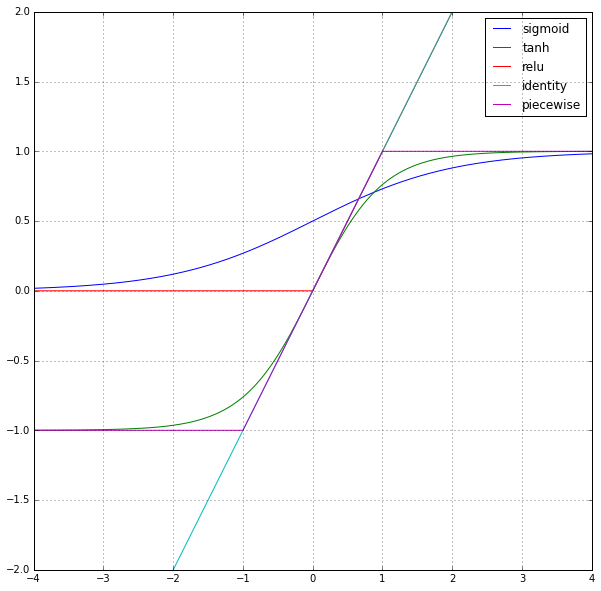

In [2]:
fig = plt.figure(1, figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(xs, ys_sig);
ax.plot(xs, ys_tanh)
ax.plot(xs, ys_relu)
ax.plot(xs, xs)
ax.plot(xs, ys_piecewise)
ax.set_ylim([-2.,2.]); ax.grid(); ax.legend(["sigmoid", "tanh", "relu", "identity","piecewise"], loc="best")
plt.show

### 2.3 多層ネットワーク ###

$$ {\bf u}^{(l+1)} = {\bf W}^{(l+1)}{\bf z}^{(l)} + {\bf b}^{(l+1)} $$
$$ {\bf z}^{(l+1)} = {\bf f}({\bf u}^{(l+1)}) $$

* ${\bf u}^{(l+1)}$はl+1層への入力
* ${\bf W}^{(l+1)}$はl層の出力からl+1層の入力を作るためのパラメータ
    * 従って${\bf W}^1$は存在しない
* ${\bf z}^{(l)}$はl層の出力
* ${\bf b}^{(l+1)}$は${\bf W}^{(l+1)}$に対応したバイアス

#### 最終出力 ####

$${\bf y}({\bf x}; {\bf w}) \equiv {\bf z}^{(L)} $$

* 全体の計算量はバイアスを除く各入力の次元が一律でN、出力の次元が一律でMとすると(この場合N=Mとなる)、L層の場合
    * 乗算`L*M*(N+1)`回, 加算`L*M*N`回、活性化関数計算`L*M`回
    * これは学習データ1サンプル辺りの計算回数
    * 3層でN=1000、サンプリングレート16kHzの場合、1秒間に16000サンプル
        * 積和算が1命令でできるチップの場合、積和の計算量の概算値は`16000*2*(10**3)*(10**3)/(10**6)=32000`[MIPS]
        * これに活性化関数の計算が加わるので全結合のネットワークの場合恐ろしい計算量

### 2.4.3 二値分類 ###

#### 事後確率$p(d=1|{\bf x})$ ####

    * dが1となる事前確率p(d=1)
    * dについての事後確率
$$ p(d=1|{\bf x}) = \frac{p({\bf x}, d=1)}{p({\bf x})} = \frac{p({\bf x}|d=1)p(d=1)}{p({\bf x})} $$

* $p({\bf x}|d=1)$を尤度と言う

#### (2.7)について ####

$$ p(d|{\bf x}) = p(d=1|{\bf x})^d p(d=0|{\bf x})^{1-d} \tag{2.7} $$

* これはある訓練データ$({\bf x},d)$のペアに対して、もしd=1であればp(d=0|x)の項は1となり結果はp(d=1|x)、逆にd=0であればp(d=1|x)の項は1となり結果はp(d=0|x)となることを表す

#### (2.7式)の変形 ####

$$ p(d=0|{\bf x}) + p(d=1|{\bf x}) = 1 $$
$$ p(d=1|{\bf x}) \simeq y({\bf x}; {\bf w}) $$
を用いると(2.7)式は以下のように記述可能
$$ p(d|{\bf x}) = p(d=1|{\bf x})^d \{1 - p(d=1|{\bf x})\}^{1-d} = y({\bf x}; {\bf w})^d \{1 - y({\bf x}; {\bf w})\}^{1-d} $$

#### ${\bf w}$の尤度 ####
* 乗法公式を用いると${\bf w}$と$d_n$の同時確率は二通りの方法で表せる
$$ p({\bf w}, d_n | {\bf x}_n ) = p({\bf w} | d_n, {\bf x}_n)p(d_n| {\bf x}_n) $$
$$ p({\bf w}, d_n | {\bf x}_n ) = p(d_n | {\bf w}, {\bf x}_n)p({\bf w}| {\bf x}_n) $$
* これらが等しいので、${\bf w}$のデータに対する事後確率は以下のように表現可能
$$ p({\bf w}| d_n, {\bf x}_n) = \frac{p(d_n| {\bf w}, {\bf x}_n)p({\bf w} | {\bf x}_n)}{p(d_n | {\bf x}_n)} $$

* $p(d_n| {\bf w}, {\bf x}_n)=p(d_n| {\bf x}_n; {\bf w})$が単一の学習データに対する尤度となるので、全学習データに関する積が学習セットに対する尤度となる

#### 事後確率とロジスティック関数の関係 ####

$$ u \equiv \log\frac{p({\bf x}, d=1)}{p({\bf x},d=0)} \iff \frac{p({\bf x}, d=1)}{p({\bf x},d=0)} = \exp(u)$$
であるので
$$ p(d=1|{\bf x}) = \frac{p({\bf x}, d=1)}{p({\bf x})} = \frac{p({\bf x}, d=1)}{p({\bf x}, d=0) + p({\bf x}, d=1)}
= \frac{1}{\frac{p({\bf x}, d=0)}{p({\bf x}, d=1)} + 1} = \frac{1}{1 + \exp(-u)}$$


### 2.4.4 多クラス分類 ###

* P.21の強制的に$u_k$を0にする対策
    * $u_0$は各入力に対して加算されるオフセット(任意の値が許されるため冗長性がある)
    * 強制的に一つのユニットへの入力を0にすると、$u_0$が$-u_k$に固定されるため任意性がなくなる

### 3.5.3 ドロップアウト ###

* 推論時のユニット数が学習時と比べて1/pに増えている？

## 深層学習読書会#2 ##

### 今回の内容 ###

* 前回の疑問
* 3.6〜4の最後まで(大橋)
* 石井さん(何かあれば)
* 5章 斉藤さん
* PFIが最近OSSとして公開したライブラリchainerを触ってみた紹介

### 前回の疑問 ###

* maxoutの真実
    * http://www.slideshare.net/stjunya/maxout-networks
    * 一つのネットワークの最終出力の手前に複数の単純な線形関数(2次元だと傾きと切片が違うようなもの)を並べて、それらの出力の最大値を取ると任意の区分線形関数を近似可能であるため、RELUなどにも勝てる
* ソフトマックス関数は$u_k$/総和では駄目なのか
    * ソフトマックス関数はその名前の通り、max関数をsoftにしたものである
        * $u_k \gg u_j$である場合には$f(u_k) \simeq 1$であり$f(u_j) \simeq 0$となる
    * ソフトマックス関数への入力はデータとクラスの同時確率の対数$\log(p({\bf x},C_k))$であると考えられる
        * 実例で示す

[-4.41454983 -6.90775528 -4.35831011 -6.43775165 -5.74460447 -3.37552963
 -2.39141631 -6.07484616 -5.71383281 -0.07257069]
[ 0.0121  0.001   0.0128  0.0016  0.0032  0.0342  0.0915  0.0023  0.0033
  0.93  ]
1.092


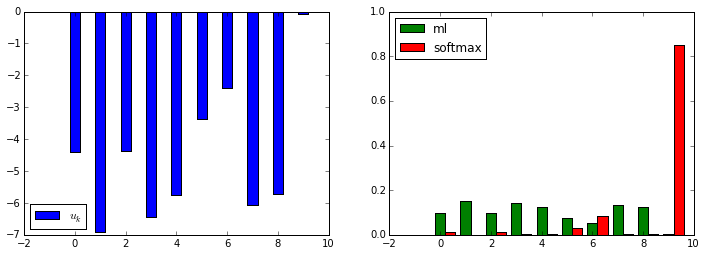

In [68]:
def softmax(xs):
    return np.exp(xs) / np.sum(np.exp(xs))

def ml(xs):
    return xs / np.sum(xs)


# データとクラスの同時確率
probs = np.array([0.0121, 0.0010, 0.0128, 0.0016, 0.0032,
                  0.0342, 0.0915, 0.0023, 0.0033, 0.93])
us = np.log(probs)  # 入力が対数確率である場合

fig = plt.figure(1, figsize=(12, 4));
ax = fig.add_subplot(121)
w = 0.4

print(us)
print(np.exp(us))  # expを取るので結局logが外れる
print(np.sum(np.exp(us)))

ax.bar(np.arange(10), us, width=w, align="center", color="b")
ax.legend(["$u_k$"], loc="best")

ax = fig.add_subplot(122)
ax.bar(np.arange(10)    , ml(us), width=w, align="center", color="g")
ax.bar(np.arange(10) + w, softmax(us), width=w, align="center", color="r")
ax.set_ylim([0.0,1.0])
ax.legend(["ml", "softmax"], loc="best")

### 3.6.4 AdaGrad ###

* i成分の時刻1から現在時刻tまでの$g_{t',i}$の二乗和の平方根で割る
* 過去の一定範囲でなく、全時刻の和なので、頻出する要素は分母が大きくなり勾配は自動的に小さくなる、その逆でたまにしか出ない要素は$g_{t',i}$が0に近い値が出ることが多いので勾配は小さく、更新速度は速い

### 3.6.5 モーメンタム ###

* 勾配を平滑化したものとみなせる
$$ \Delta{\bf w}^{(t-1)} \equiv {\bf w}^{(t-1)} - {\bf w}^{(t-2)} = -\epsilon\nabla E_t^{(t-1)} + \mu \Delta{\bf w}^{(t-2)}$$
であるので、現在時刻の勾配と前時刻の勾配の関係は以下のようになる
$$ \Delta{\bf w}^{(t)} = -\epsilon\nabla E_t^{(t)} + \mu \Delta{\bf w}^{(t-1)} $$
$$ = -\epsilon\nabla E_t^{(t)} + \mu \left\{ -\epsilon\nabla E_t^{(t-1)} + \mu \Delta{\bf w}^{(t-2)} \right\} $$

* $\Delta{\bf w}$が一定だとすると
$$ \Delta{\bf w} = -\epsilon\nabla E_t^{(t)} + \mu \Delta{\bf w} \iff \Delta{\bf w} = -\frac{1}{1-\mu}\epsilon\nabla E_t^{(t)} $$

### 3.6.6 重みの初期化 ###

$$u_j = \sum_i w_{ji} x_i $$
において$w_{ji}$のばらつきが大きいと、ロジスティック関数に入力される$u_j$が極端な値を取り、ロジスティック関数の出力が-1や1になる。そうなると傾きが0となるので一次微分が0となってしまい学習が上手くいかない。
$u_j$の分散は
$$V(u_j) = (u_j - \bar{u_j})^2 = \left\{\sum_i w_{ji} x_i - {\rm const} \right\}^2 = \left\{\sum_i w_{ji} x_i \right\}\left\{\sum_i w_{ji} x_i \right\} $$
xが独立だと仮定すると、クロス項が消えて
$$ = \sum_i w_{ji}^2 V(x_i) = \sum_i w_{ji}^2 $$
と計算できる。

$$V(u_j) = \sigma_u^2$$
にしたい場合は入力ユニット数をMとすると重みの標準偏差を$\sigma = \sigma_u / M^{-2}$としておけば、
$$V(u_j) = \sum_i^M w_{ji}^2 = \sum_i^M (\sigma_u / M^{-2})^2 = M \sigma_u^2 / M^4 $$
$\sigma = \sigma_u / M^{1/2}$の間違いではないか？

## 5章 5.4以降 ##

### 5.4.1 ベルヌーイ分布に対するKL情報量 ###

#### ベルヌーイ分布 ####

確率pで1を取り(1-p)で0を取る分布。
$$p(k)=p^k (1-p)^{1-k}$$
ただしkは0か1

#### 平均活性度 ####

$$\hat{\rho}_j=\frac{1}{N}\sum_{n=1}^{N}y_j({\bf x}_n) \tag{5.3}$$

#### KL情報量の定義 ####

$${\rm KL}(P||Q)=\sum_i p(i)\log\frac{p(i)}{q(i)}$$

#### 平均活性度とターゲット分布の間のKL情報量 ####

$${\rm KL}(\rho||\hat{\rho})=p(1)\log\frac{p(1)}{q(1)}+p(0)\log\frac{p(0)}{q(0)}=\rho\log\frac{\rho}{\hat{\rho}}+(1-\rho)\log\frac{(1-\rho)}{(1-\hat{\rho})}$$


### 5.4.2 スパース正則化項に対する入力に対する微分 ###

#### 誤差逆伝搬法の結論の式((4.11)、(4.12)、(4.13)) ####

$$ \delta_j^{(l)} \equiv \frac{\partial E_n}{\partial u_j^{(l)}} \tag{4.11} $$
$$ \delta_j^{(l)}=\sum_k \delta_k^{(l+1)} \left( w_{kj}^{(l+1)} f^{'} (u_j^{(l)}) \right) \tag{4.12} $$
$$ \frac{\partial E_n}{\partial w_{ji}^{(l)}} = \delta_j^{(l)}z_i^{(l-1)} \tag{4.13} $$

ここではデルタの計算には誤差関数の入力に対する微分が必要なので正則化項の微分を計算する必要があるが、正則化項においては入力に依存しているのは平均活性度の部分のみであるため平均活性度による微分と平均活性度の入力に対する微分とに分けて考えている。



### 5.5 データの白色化 ###

$$ {\bf \Phi}_x \equiv \frac{1}{N}\sum_{n=1}^N {\bf x}_n{\bf x}_n^T = \frac{1}{N}{\bf X}{\bf X}^T $$
$$ {\bf X} = [{\bf x}_1,...,{\bf x}_n] $$

適当な線形変換行列${\bf P}$で${\bf x}_n$を変換

$${\bf u}_n = {\bf P}{\bf x}_n$$
$${\bf \Phi}_u \equiv \frac{1}{N}\sum_{n=1}^N {\bf u}_n{\bf u}_n^T = \frac{1}{N}{\bf U}{\bf U}^T $$
$${\bf U} = [{\bf u}_1,...,{\bf u}_n]$$

これが${\bf \Phi}_u = {\bf I}$と表現できることが目的であるので、この仮定をおくと

$${\bf \Phi}_u \equiv \frac{1}{N}{\bf P}{\bf X}{\bf X}^T{\bf P}^T = {\bf P}{\bf \Phi}_x{\bf P}^T = {\bf I}$$

両辺の逆行列を計算すると
$$ {\bf \Phi}_x = {\bf P}^{-1} ({\bf P}^T)^{-1} = ({\bf P}^T{\bf P})^{-1}$$
$$ {\bf \Phi}_x^{-1} = {\bf P}^T{\bf P} \tag{5.5}$$

${\bf \Phi}_x$が$ {\bf \Phi}_x = {\bf E}{\bf D}{\bf E}^T $と固有値を対角方向に並べた行列${\bf D}$および直交行列${\bf E}$を使って固有値分解できるとすると、

$$ {\bf \Phi}_x^{-1} = ({\bf E}{\bf D}{\bf E}^T)^{-1} = {\bf E}{\bf D}^{-1}{\bf E}^T $$

これが(5.5)と一致するので

$$ {\bf E}{\bf D}^{-1}{\bf E}^T = {\bf P}^T{\bf P} $$

これを満たす行列${\bf P}$は${\bf P}={\bf Q}{\bf D}^{-1/2}{\bf E}^T$と表現できる(${\bf Q}$は{\bf P}と同サイズの任意の直交行列、${\bf D}^{-1/2}$は固有値の1/2乗が対角方向に並んだ行列)。なぜならば、そのように置いた場合、${\bf Q}$が直交行列であることと、${\bf D}$が対角行列であるため転置しても${\bf D}$のままであることを考慮すると

$$ {\bf P}^T{\bf P} = ({\bf Q}{\bf D}^{-1/2}{\bf E})^T ({\bf Q}{\bf D}^{-1/2}{\bf E}) = {\bf E} ({\bf D}^{-1/2})^T {\bf Q}^T {\bf Q} {\bf D}^{-1/2} {\bf E}^T = {\bf E} ({\bf D}^{-1/2})^T {\bf D}^{-1/2} {\bf E}^T  = {\bf E} {\bf D}^{-1} {\bf E}^T $$

と変形可能であり、先の条件の形と一致するためである。ここから${\bf Q}$には任意性があることが分かる。この変形のことをPCAと呼び、
${\bf Q}$が${\bf E}$の場合は特別にZCAと呼ぶ。

## 7章 ##


### 7.4 RNNの誤差逆伝播法 ###

* 2種類の方法
    * RTRL(Realtime Recurrent Learning)
        * 1時刻前に計算した勾配を次の時刻に伝搬させる
        * オンライン学習が可能だが計算量が多い
    * BPTT(Backpropagation thorugh time)
        * 未来の時刻のデルタを過去にフィードバック
        * 全時刻(実際には一定時刻分のみ)のサンプルを保持する必要があるためオンライン学習には向かない
* 参考
    * http://ds9.jaist.ac.jp:8080/ResearchData/sub/99/kobayashi/node5.html
    * http://deeplearning.cs.cmu.edu/notes/shaoweiwang.pdf
    * http://qiita.com/icoxfog417/items/2791ee878deee0d0fd9c
    
### BPTTの誤差逆伝播 ###

* 誤差逆伝搬法の結論の式((4.11)、(4.12)、(4.13))

$$ \delta_j^{(l)} \equiv \frac{\partial E_n}{\partial u_j^{(l)}} \tag{4.11} $$
$$ \delta_j^{(l)}=\sum_k \delta_k^{(l+1)} \left( w_{kj}^{(l+1)} f^{'} (u_j^{(l)}) \right) \tag{4.12} $$
$$ \frac{\partial E_n}{\partial w_{ji}^{(l)}} = \delta_j^{(l)}z_i^{(l-1)} \tag{4.13} $$

#### (4.12)式の中間層における変形 ####

時刻tにおける中間層のユニットに関しては時刻t+1の中間層のユニットとも繋がりがあるため、t+1時刻からのデルタを逆伝搬させるために(4.12)式が変形される

$$ \delta_j^t = \left\{ \sum_k w_{kj}^{{\rm out}} \delta_k^{{\rm out,t}}  + \sum_{j'} w_{j'j} \delta_{j'}^{t+1} \right\} f^{'} (u_j^{t}) \tag{7.7} $$

#### (4.13)式の変形 ####

重みに対する誤差関数の微分は全時刻にわたって計算されるため(4.13)式を変形すると

$$ \frac{\partial E}{\partial w_{ji}^{{\rm in}}}  = \sum_{t=1}^T \delta_j^t x_i^t $$
$$ \frac{\partial E}{\partial w_{jj'}}            = \sum_{t=1}^T \delta_j^t z_j^{t-1} $$
$$ \frac{\partial E}{\partial w_{kj}^{{\rm out}}} = \sum_{t=1}^T \delta_j^t z_j^t $$
